Dans ce notebook, on va utiliser le dataset cleané et pré-traité et on va essayer et évaluer différents algorithmes de régression pour prédire la consommation électrique des batiments de seattle.

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-du-dataset" data-toc-modified-id="Import-du-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import du dataset</a></span></li><li><span><a href="#Séparation-en-données-d'apprentissage-et-données-de-test" data-toc-modified-id="Séparation-en-données-d'apprentissage-et-données-de-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Séparation en données d'apprentissage et données de test</a></span></li><li><span><a href="#Modèles-predictifs" data-toc-modified-id="Modèles-predictifs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèles predictifs</a></span><ul class="toc-item"><li><span><a href="#Modèle-baseline:-DummyRegressor" data-toc-modified-id="Modèle-baseline:-DummyRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modèle baseline: DummyRegressor</a></span></li><li><span><a href="#Modèle-Ridgecv()" data-toc-modified-id="Modèle-Ridgecv()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modèle Ridgecv()</a></span></li><li><span><a href="#Modèle-Support-Vector-Machines" data-toc-modified-id="Modèle-Support-Vector-Machines-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Modèle Support Vector Machines</a></span></li><li><span><a href="#Modèle-RandomForest" data-toc-modified-id="Modèle-RandomForest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Modèle RandomForest</a></span></li></ul></li><li><span><a href="#évaluation-de--l’intérêt-de-la-variable-&quot;ENERGYSTARScore&quot;-pour-la-prédiction-d’émissions" data-toc-modified-id="évaluation-de--l’intérêt-de-la-variable-&quot;ENERGYSTARScore&quot;-pour-la-prédiction-d’émissions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>évaluation de  l’intérêt de la variable "ENERGYSTARScore" pour la prédiction d’émissions</a></span></li><li><span><a href="#Interprétation-du-model" data-toc-modified-id="Interprétation-du-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interprétation du model</a></span></li></ul></div>

## Import du dataset

In [1]:
#pip install --upgrade pip 

In [2]:
#!pip install lime eli5 scikit-image xgboost keras tensorflow --upgrade

In [3]:
#pip install eli5 --upgrade

In [4]:
#pip install shap

In [5]:
import shap


In [6]:
%%time 
import pandas as pd
import numpy as np
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import cross_validate 

InteractiveShell.ast_node_interactivity = "all"
       
path = r"\Users\Utilisateur\Downloads\building-energy-benchmarking-clean.csv"#### le chemin vers le répertoire des données

def import_Data(path,separator):
     
    return pd.read_csv(path, sep = separator)
data= import_Data(path, separator = ',')

Wall time: 40.9 ms


## Séparation en données d'apprentissage et données de test

Log Transformation est une technique qui rend nos données originales asymétriques plus normales. Il améliore la linéarité entre nos variables dépendantes et indépendantes. Il renforce la validité de nos analyses statistiques.

On a remarqué que c'est le cas pour notre variable cible, donc on va lui appliquer cette transformation.

In [7]:
data[["SiteEnergyUse(kBtu)","TotalGHGEmissions"]].describe()
data[["SiteEnergyUse(kBtu)","TotalGHGEmissions"]].info()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,6.532000e+03,6532.000000
mean,5.258070e+06,116.127936
std,1.835044e+07,484.567028
min,1.144100e+04,0.080000
25%,9.283485e+05,9.487500
50%,1.793138e+06,33.225000
75%,4.188888e+06,92.002500
max,8.739237e+08,16870.980000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SiteEnergyUse(kBtu)  6532 non-null   float64
 1   TotalGHGEmissions    6532 non-null   float64
dtypes: float64(2)
memory usage: 102.2 KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6532 non-null   object 
 1   PrimaryPropertyType              6532 non-null   object 
 2   ZipCode                          6519 non-null   float64
 3   Neighborhood                     6532 non-null   object 
 4   Latitude                         6532 non-null   float64
 5   Longitude                        6532 non-null   float64
 6   NumberofBuildings                6532 non-null   float64
 7   NumberofFloors                   6524 non-null   float64
 8   PropertyGFAParking               6532 non-null   int64  
 9   PropertyGFABuilding(s)           6532 non-null   int64  
 10  LargestPropertyUseTypeGFA        6388 non-null   float64
 11  SecondLargestPropertyUseTypeGFA  3202 non-null   float64
 12  ThirdLargestProperty

In [9]:
random_state = 0

In [10]:
from sklearn.model_selection import train_test_split
y = np.log(data[["SiteEnergyUse(kBtu)","TotalGHGEmissions"]])
X = data.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
list(data.columns)

['BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Age']

In [12]:
y.describe()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,6532.000000,6532.000000
mean,14.575760,3.486109
std,1.152416,1.499750
min,9.344959,-2.525729
25%,13.741162,2.249975
50%,14.399478,3.503303
75%,15.247946,4.521816
max,20.588504,9.733350


In [13]:
X_train.describe()
X_train.shape

,ZipCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Age
count,5215.000000,5225.000000,5225.000000,5225.000000,5218.000000,5225.000000,5.225000e+03,5.115000e+03,2561.000000,917.000000,3929.000000,5225.000000
mean,57442.078811,47.624231,-122.335171,1.076172,4.720008,9747.841148,8.350534e+04,7.694782e+04,28111.875946,11286.227261,67.642912,47.099522
std,39656.599117,0.047626,0.026790,1.771374,5.426737,34149.188561,1.840748e+05,1.778129e+05,52189.843033,24305.768088,26.967743,33.068101
min,17916.000000,47.499331,-122.411820,0.000000,0.000000,-2.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000
25%,18390.000000,47.600010,-122.350660,1.000000,2.000000,0.000000,2.703500e+04,2.493900e+04,4993.000000,2377.000000,52.000000,19.000000
50%,19584.000000,47.618331,-122.332720,1.000000,4.000000,0.000000,4.160000e+04,3.888000e+04,10700.000000,5100.000000,75.000000,41.000000
75%,98112.000000,47.657084,-122.320150,1.000000,5.000000,0.000000,8.098000e+04,7.298500e+04,26640.000000,10568.000000,90.000000,68.000000
max,98272.000000,47.733870,-122.220470,111.000000,99.000000,512608.000000,9.320156e+06,9.320156e+06,686750.000000,303910.000000,100.000000,116.000000


(5225, 15)

In [14]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Modèles predictifs

On va commencer par la séparation de nos colonnes par leurs types, la création de notre pipeline qui va contenir un imputer de données manquantes et un objet de normalisation de données et le codage des données  


In [15]:
list(X_train.columns)


['BuildingType',
 'PrimaryPropertyType',
 'ZipCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'Age']

In [16]:
y_train.columns

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], dtype='object')

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import shap
import time

numeric_features = [ 'PropertyGFAParking','PropertyGFABuilding(s)','ZipCode', 'Age', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA' , 'NumberofFloors', 'NumberofBuildings', 'Latitude', 'Longitude','ENERGYSTARScore']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ["BuildingType","PrimaryPropertyType",'Neighborhood']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

set_config(display = 'diagram')






### Modèle baseline: DummyRegressor

On a besoin d'un modèle qui sert de baseline de comparaison, pour cela, on va utiliser un algorithme qui prédit la moyenne sur toutes les valeurs.
On va créer un modèle pour chaque variable cible.

In [18]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
dummy_regr = DummyRegressor(strategy="mean")
model = Pipeline([('preprocessor',preprocessor),('Regressor', dummy_regr)]) 
set_config(display = 'diagram')

On va créer les métriques, qu'on va utiliser pour comparer les performances des modèles.

In [19]:


def RMSE(y_true,y_pred):
    rmse = mean_squared_error(np.exp(y_true), np.exp(y_pred), squared=False)
    return rmse

def R2(y_true,y_pred):    
    return r2_score(y_true, y_pred)

def two_score_r2(y_true,y_pred):    
    
    score = R2(y_true,y_pred)
    return score

def two_score_rmse(y_true,y_pred):    
    rmse = RMSE(y_true,y_pred) 
    
    return  rmse

def two_scorer_r2():
    return make_scorer(two_score_r2, greater_is_better=True) 

def two_scorer_rmse():
    return make_scorer(two_score_rmse, greater_is_better=True) 

#def RMSE_loss(a,b):
    #return mean_squared_error(np.exp(a), np.exp(b), squared=False)
#def R2_score(a,b):
    #return metrics.r2_score(a,b)

scoring={'r2': two_scorer_r2(),
         'rmse': two_scorer_rmse()}


In [20]:
result_cv_energy = cross_validate(model, X = X_train, y = y_train["SiteEnergyUse(kBtu)"], scoring = scoring , return_train_score = True)
result_cv_ghg = cross_validate(model, X = X_train, y = y_train["TotalGHGEmissions"], scoring = scoring , return_train_score = True)


In [21]:
#  On va calculer les performances du modèle sur le test set 
model_dummy_energy = model.fit(X_train,y_train["SiteEnergyUse(kBtu)"])
prediction = model_dummy_energy.predict(X_test)
results_test_r2_energy = model_dummy_energy.score(X_test, y_test["SiteEnergyUse(kBtu)"])
results_test_rmse_energy = mean_squared_error(np.exp(prediction), np.exp(y_test["SiteEnergyUse(kBtu)"]), squared=False)

In [22]:
#  On va calculer les performances du modèle sur le test set
model_dummy_ghg = model.fit(X_train,y_train["TotalGHGEmissions"])
prediction = model_dummy_ghg.predict(X_test)
results_test_r2_ghg = model_dummy_ghg.score(X_test, y_test["TotalGHGEmissions"])
results_test_rmse_ghg= mean_squared_error(np.exp(prediction), np.exp(y_test["TotalGHGEmissions"]), squared=False)

In [23]:
resultats_energy={"Model"             :['DummyRegressor','Ridge','Support Vector Machines','RandomForest'],
           "results_train_r2"  :[],
           "results_train_rmse":[],
           "results_validation_r2"   :[],
           "results_validation_rmse" :[],
           "results_test_r2"   :[],
           "results_test_rmse" :[],
           "Training_time"     :[],
           "Prediction_time"   :[],
          }
resultats_ghg={"Model"             :['DummyRegressor','Ridge','Support Vector Machines','RandomForest'],
           "results_train_r2"  :[],
           "results_train_rmse":[],
           "results_validation_r2"   :[],
           "results_validation_rmse" :[],
           "results_test_r2"   :[],
           "results_test_rmse" :[],
           "Training_time"     :[],
           "Prediction_time"   :[],
          }

In [24]:
resultats_energy['results_train_r2'].append(result_cv_energy['train_r2'].mean())
resultats_energy['results_train_rmse'].append(result_cv_energy['train_rmse'].mean())
resultats_energy['results_validation_r2'].append(result_cv_energy['test_r2'].mean())
resultats_energy['results_validation_rmse'].append(result_cv_energy['test_rmse'].mean())
resultats_energy['results_test_r2'].append(results_test_r2_energy)
resultats_energy['results_test_rmse'].append(results_test_rmse_energy)
resultats_energy['Training_time'].append(result_cv_energy['fit_time'].mean())
resultats_energy['Prediction_time'].append(result_cv_energy['score_time'].mean())

In [25]:
resultats_ghg['results_train_r2'].append(result_cv_ghg['train_r2'].mean())
resultats_ghg['results_train_rmse'].append(result_cv_ghg['train_rmse'].mean())
resultats_ghg['results_validation_r2'].append(result_cv_ghg['test_r2'].mean())
resultats_ghg['results_validation_rmse'].append(result_cv_ghg['test_rmse'].mean())
resultats_ghg['results_test_r2'].append(results_test_r2_ghg)
resultats_ghg['results_test_rmse'].append(results_test_rmse_ghg)
resultats_ghg['Training_time'].append(result_cv_ghg['fit_time'].mean())
resultats_ghg['Prediction_time'].append(result_cv_ghg['score_time'].mean())

In [26]:
print("Training r2 score: {}".format(result_cv_energy['train_r2'].mean()))
print("Training rmse score: {}".format(result_cv_energy['train_rmse'].mean()))
print("Testing r2 score:{}".format(result_cv_energy['test_r2'].mean()))
print("Testing rmse score: {}".format(result_cv_energy['test_rmse'].mean()))

Training r2 score: 0.0
Training rmse score: 18529281.91443821
Testing r2 score:-0.00042044577872975
Testing rmse score: 16758864.815191736


Pour la phase de training, Le résultats de la métrique 'r2' est logique, car son équation est égale à 
$ 1 -  \frac{\sum_{i=1}^n (y_i -\hat{y _i})^2  }{\sum_{i=1}^n (y_i -\bar{y_i})^2  }$ où $\hat{y _i}$ est la valeur prédite et  $ \bar{y_i} $ est la moyenne des valeurs de y
Alors dans notre cas où  $\hat{y _i}$ = $ \bar{y_i} $, $r2= 0$, on remarque que la valeur obtenue est quasi-nulle.

Le score rmse veut dire que notre algorithme fait une erreur moyenne de 1.32 de l'unité de notre variable.

### Modèle Ridgecv()

In [27]:
from sklearn.linear_model import RidgeCV

model = Pipeline([('preprocessor', preprocessor),('Regressor', RidgeCV(alphas=[ 1e-1,0.5, 1,1.5,2,3,4,5,10,20,30,100]))]) 
model_Ridge_energy=model.fit( X_train, y_train["SiteEnergyUse(kBtu)"])
model_Ridge_ghg=model.fit( X_train, y_train["TotalGHGEmissions"])

result_cv_energy = cross_validate(model_Ridge_energy, X = X_train, y = y_train["SiteEnergyUse(kBtu)"], scoring = scoring , return_train_score = True)
result_cv_ghg = cross_validate(model_Ridge_ghg, X = X_train, y = y_train["TotalGHGEmissions"], scoring = scoring , return_train_score = True)


In [28]:
#  On va calculer les performances du modèle sur le test set 
prediction = model_Ridge_energy.predict(X_test)
results_test_r2_energy = model_Ridge_energy.score(X_test, y_test["SiteEnergyUse(kBtu)"])
results_test_rmse_energy = mean_squared_error(np.exp(prediction), np.exp(y_test["SiteEnergyUse(kBtu)"]), squared=False)
#  On va calculer les performances du modèle sur le test set
prediction = model_Ridge_ghg.predict(X_test)
results_test_r2_ghg = model_Ridge_ghg.score(X_test, y_test["TotalGHGEmissions"])
results_test_rmse_ghg= mean_squared_error(np.exp(prediction), np.exp(y_test["TotalGHGEmissions"]), squared=False)

In [29]:
resultats_ghg['results_train_r2'].append(result_cv_ghg['train_r2'].mean())
resultats_ghg['results_train_rmse'].append(result_cv_ghg['train_rmse'].mean())
resultats_ghg['results_validation_r2'].append(result_cv_ghg['test_r2'].mean())
resultats_ghg['results_validation_rmse'].append(result_cv_ghg['test_rmse'].mean())
resultats_ghg['results_test_r2'].append(results_test_r2_ghg)
resultats_ghg['results_test_rmse'].append(results_test_rmse_ghg)
resultats_ghg['Training_time'].append(result_cv_ghg['fit_time'].mean())
resultats_ghg['Prediction_time'].append(result_cv_ghg['score_time'].mean())

In [30]:
resultats_energy['results_train_r2'].append(result_cv_energy['train_r2'].mean())
resultats_energy['results_train_rmse'].append(result_cv_energy['train_rmse'].mean())
resultats_energy['results_validation_r2'].append(result_cv_energy['test_r2'].mean())
resultats_energy['results_validation_rmse'].append(result_cv_energy['test_rmse'].mean())
resultats_energy['results_test_r2'].append(results_test_r2_energy)
resultats_energy['results_test_rmse'].append(results_test_rmse_energy)
resultats_energy['Training_time'].append(result_cv_energy['fit_time'].mean())
resultats_energy['Prediction_time'].append(result_cv_energy['score_time'].mean())

In [31]:

#!pip install -q keras==2.3.1

In [32]:
import eli5

Using TensorFlow backend.


In [33]:
print(" La meilleure valeur d'alpha pour SiteEnergyUse(kBtu) est : {}".format(model_Ridge_energy["Regressor"].alpha_))
print(" La meilleure valeur d'alpha pour TotalGHGEmissions est : {}".format(model_Ridge_ghg["Regressor"].alpha_))

 La meilleure valeur d'alpha pour SiteEnergyUse(kBtu) est : 0.1
 La meilleure valeur d'alpha pour TotalGHGEmissions est : 0.1


In [34]:
preprocessor = model_Ridge_energy.named_steps["preprocessor"]

In [35]:
ohe_categories = preprocessor.named_transformers_["cat"].categories_

In [36]:
new_ohe_features = [f"{col}__{val}" for col, vals in zip(categorical_features, ohe_categories) for val in vals]

In [37]:
all_features = numeric_features + new_ohe_features

In [38]:
len(all_features)

64

In [39]:
A = model["preprocessor"].transform(X_train)

In [40]:
A.shape[1]

64

In [41]:
A.shape

(5225, 64)

###  Modèle Support Vector Machines

Dans cette partie on va utiliser la technique de "cross_validation" pour l'optimisation des hyper-paramètres  et la séléction du meilleur model.

In [42]:
from sklearn import svm

parameters = {'Regressor__kernel':('linear', 'rbf'), 'Regressor__C':[1,2,3, 10]}
svr = svm.SVR()
model_Energy = Pipeline([('preprocessor',preprocessor),('Regressor', svr)])
model_GHG = Pipeline([('preprocessor',preprocessor),('Regressor', svr)])
research_Energy = GridSearchCV(model_Energy, param_grid = parameters,scoring='r2',refit = True, return_train_score=True)
research_GHG = GridSearchCV(model_GHG, param_grid = parameters,scoring='r2',refit = True, return_train_score=True)

In [43]:
research_Energy.fit(X_train, y_train['SiteEnergyUse(kBtu)'])
research_GHG.fit(X_train, y_train['TotalGHGEmissions'])

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'ZipCode',
                                                                          'Age',
                                                                          'ThirdLargestPropertyUseTypeGFA',
                                                                          'SecondLargestPropertyUseTypeGFA',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'NumberofFloors',
                                                                          'NumberofBuildings',
                                                                          'Latitude',
                                                                          'Longitude',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood'])])),
                                       ('Regressor', SVR())]),
             param_grid={'Regressor__C': [1, 2, 3, 10],
                         'Regressor__kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='r2')

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'ZipCode',
                                                                          'Age',
                                                                          'ThirdLargestPropertyUseTypeGFA',
                                                                          'SecondLargestPropertyUseTypeGFA',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'NumberofFloors',
                                                                          'NumberofBuildings',
                                                                          'Latitude',
                                                                          'Longitude',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood'])])),
                                       ('Regressor', SVR())]),
             param_grid={'Regressor__C': [1, 2, 3, 10],
                         'Regressor__kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='r2')

In [44]:
research_Energy.best_params_
research_GHG.best_params_

{'Regressor__C': 10, 'Regressor__kernel': 'rbf'}

{'Regressor__C': 10, 'Regressor__kernel': 'rbf'}

In [45]:
#svr = svm.SVR(C=10,kernel='rbf')


In [46]:
#svr = svm.SVR(C=10,kernel='rbf')
model_svr_energy = research_Energy.best_estimator_

#model_svr_energy =  model_svr_energy.fit(X_train, y_train['SiteEnergyUse(kBtu)'])



model_svr_GHG = research_GHG.best_estimator_

#model_svr_GHG = model_svr_GHG.fit(X_train, y_train['TotalGHGEmissions'])


prediction = model_svr_GHG.predict(X_test)
results_test_r2_ghg= model_svr_GHG.score(X_test,y_test['TotalGHGEmissions'])
results_test_rmse_ghg = mean_squared_error(model_svr_GHG.predict(X_test),y_test['TotalGHGEmissions'], squared=False)

prediction = model_svr_energy.predict(X_test)
results_test_r2_energy= model_svr_energy.score(X_test,y_test['SiteEnergyUse(kBtu)'])
results_test_rmse_energy = mean_squared_error(np.exp(prediction), np.exp(y_test['SiteEnergyUse(kBtu)']), squared=False)

result_cv_energy = cross_validate(model_svr_energy, X = X_train, y = y_train['SiteEnergyUse(kBtu)'], scoring = scoring , return_train_score = True)
result_cv_ghg = cross_validate(model_svr_GHG, X = X_train, y = y_train['TotalGHGEmissions'], scoring = scoring , return_train_score = True)



In [47]:
resultats_ghg['results_train_r2'].append(result_cv_ghg['train_r2'].mean())
resultats_ghg['results_train_rmse'].append(result_cv_ghg['train_rmse'].mean())
resultats_ghg['results_validation_r2'].append(result_cv_ghg['test_r2'].mean())
resultats_ghg['results_validation_rmse'].append(result_cv_ghg['test_rmse'].mean())
resultats_ghg['results_test_r2'].append(results_test_r2_ghg)
resultats_ghg['results_test_rmse'].append(results_test_rmse_ghg)
resultats_ghg['Training_time'].append(result_cv_ghg['fit_time'].mean())
resultats_ghg['Prediction_time'].append(result_cv_ghg['score_time'].mean())


In [48]:
resultats_energy['results_train_r2'].append(result_cv_energy['train_r2'].mean())
resultats_energy['results_train_rmse'].append(result_cv_energy['train_rmse'].mean())
resultats_energy['results_validation_r2'].append(result_cv_energy['test_r2'].mean())
resultats_energy['results_validation_rmse'].append(result_cv_energy['test_rmse'].mean())
resultats_energy['results_test_r2'].append(results_test_r2_energy)
resultats_energy['results_test_rmse'].append(results_test_rmse_energy)
resultats_energy['Training_time'].append(result_cv_energy['fit_time'].mean())
resultats_energy['Prediction_time'].append(result_cv_energy['score_time'].mean())


### Modèle RandomForest

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model_forest = Pipeline([('preprocessor',preprocessor),('Regressor', RandomForestRegressor())]) 

 On va essayer de trouver les meilleurs hyper-paramètres à l'aide de 'gridsearch'

In [50]:

param_grid = {'Regressor__min_samples_split' :[2, 3], # Minimum number of samples required to split a node 
              'Regressor__min_samples_leaf'  :[1, 2], # Minimum number of samples required at each leaf node
              'Regressor__max_features'      :['auto', 'sqrt'], # Number of features to consider at every split
              'Regressor__max_depth'         : [None, 2, 4, 6],# Maximum number of levels in tree
             }
research_energy = GridSearchCV(model_forest, param_grid = param_grid, scoring='r2', return_train_score=True)
research_ghg = GridSearchCV(model_forest, param_grid = param_grid, scoring='r2', return_train_score=True)

In [51]:
model_forest_energy = research_energy.fit(X_train, y_train["SiteEnergyUse(kBtu)"])
model_forest_ghg = research_ghg.fit(X_train, y_train["TotalGHGEmissions"])

In [52]:
model_forest_energy.best_params_

{'Regressor__max_depth': None,
 'Regressor__max_features': 'sqrt',
 'Regressor__min_samples_leaf': 1,
 'Regressor__min_samples_split': 2}

In [53]:
model_forest_ghg.best_params_

{'Regressor__max_depth': None,
 'Regressor__max_features': 'auto',
 'Regressor__min_samples_leaf': 1,
 'Regressor__min_samples_split': 2}

In [54]:
model_forest_energy = model_forest_energy.best_estimator_
model_forest_ghg = model_forest_ghg.best_estimator_

In [55]:

#model_forest = Pipeline([('preprocessor',preprocessor),('Regressor', RandomForestRegressor( max_depth = research.best_params_['Regressor__max_depth'], min_samples_split = research.best_params_['Regressor__min_samples_split'], min_samples_leaf = research.best_params_['Regressor__min_samples_leaf'], max_features = research.best_params_['Regressor__max_features']))]) 


prediction = model_forest_energy.predict(X_test)
results_test_r2_energy= model_forest_energy.score(X_test,y_test["SiteEnergyUse(kBtu)"])
results_test_rmse_energy = mean_squared_error(np.exp(prediction),np.exp(y_test["SiteEnergyUse(kBtu)"]), squared=False)

prediction = model_forest_ghg.predict(X_test)

results_test_r2_ghg= model_forest_ghg.score(X_test,y_test["TotalGHGEmissions"])
results_test_rmse_ghg = mean_squared_error(np.exp(prediction),np.exp(y_test["TotalGHGEmissions"]), squared=False)

result_cv_energy = cross_validate(model_forest_energy, X = X_train, y = y_train["SiteEnergyUse(kBtu)"], scoring = scoring , return_train_score = True)
result_cv_ghg = cross_validate(model_forest_ghg, X = X_train, y = y_train["TotalGHGEmissions"], scoring = scoring , return_train_score = True)


In [56]:
resultats_ghg['results_train_r2'].append(result_cv_ghg['train_r2'].mean())
resultats_ghg['results_train_rmse'].append(result_cv_ghg['train_rmse'].mean())
resultats_ghg['results_validation_r2'].append(result_cv_ghg['test_r2'].mean())
resultats_ghg['results_validation_rmse'].append(result_cv_ghg['test_rmse'].mean())
resultats_ghg['results_test_r2'].append(results_test_r2_ghg)
resultats_ghg['results_test_rmse'].append(results_test_rmse_ghg)
resultats_ghg['Training_time'].append(result_cv_ghg['fit_time'].mean())
resultats_ghg['Prediction_time'].append(result_cv_ghg['score_time'].mean())

resultats_energy['results_train_r2'].append(result_cv_energy['train_r2'].mean())
resultats_energy['results_train_rmse'].append(result_cv_energy['train_rmse'].mean())
resultats_energy['results_validation_r2'].append(result_cv_energy['test_r2'].mean())
resultats_energy['results_validation_rmse'].append(result_cv_energy['test_rmse'].mean())
resultats_energy['results_test_r2'].append(results_test_r2_energy)
resultats_energy['results_test_rmse'].append(results_test_rmse_energy)
resultats_energy['Training_time'].append(result_cv_energy['fit_time'].mean())
resultats_energy['Prediction_time'].append(result_cv_energy['score_time'].mean())

In [57]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Training_time'}, xlabel='Model'>

<AxesSubplot:title={'center':'Prediction_time'}, xlabel='Model'>

<AxesSubplot:title={'center':'r2_score'}, xlabel='Model'>

<AxesSubplot:title={'center':'rmse_score'}, xlabel='Model'>

<AxesSubplot:title={'center':'rmse_score'}, xlabel='Model'>

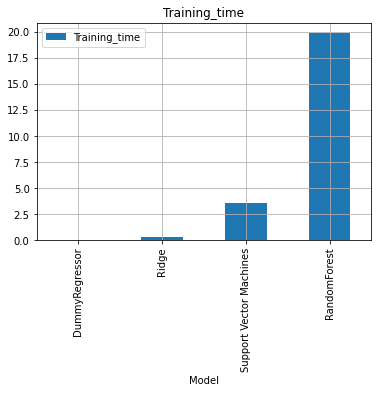

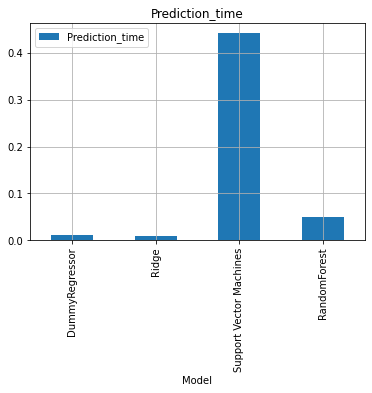

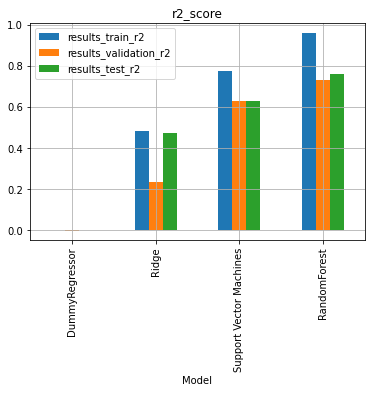

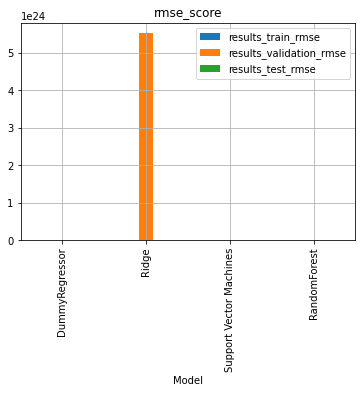

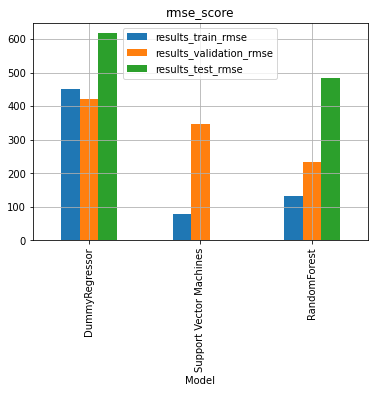

In [58]:

#results_df = pd.DataFrame.from_dict(resultats).set_index('Model')
results_df = pd.DataFrame.from_dict(resultats_ghg).set_index('Model')

results_df[["Training_time"]].plot(kind = 'bar', grid = True, title = "Training_time" )
results_df.drop(["Training_time"],axis=1, inplace=True)

results_df[["Prediction_time"]].plot(kind='bar', grid = True, title = "Prediction_time")
results_df.drop(["Prediction_time"],axis=1, inplace=True)

results_df[["results_train_r2","results_validation_r2",'results_test_r2']].plot(kind='bar' , grid = True, title = "r2_score")
results_df.drop(["results_train_r2","results_validation_r2","results_test_r2"],axis=1, inplace=True)

results_df.plot(kind='bar', grid = True, title = "rmse_score",use_index = True)
results_df.drop(index='Ridge',inplace = True)
results_df.plot(kind='bar', grid = True, title = "rmse_score")


<AxesSubplot:title={'center':'Training_time'}, xlabel='Model'>

<AxesSubplot:title={'center':'Prediction_time'}, xlabel='Model'>

<AxesSubplot:title={'center':'r2_score'}, xlabel='Model'>

<AxesSubplot:title={'center':'r2_score'}, xlabel='Model'>

<AxesSubplot:title={'center':'rmse_score'}, xlabel='Model'>

<AxesSubplot:title={'center':'rmse_score'}, xlabel='Model'>

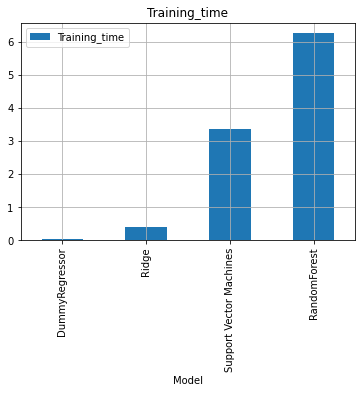

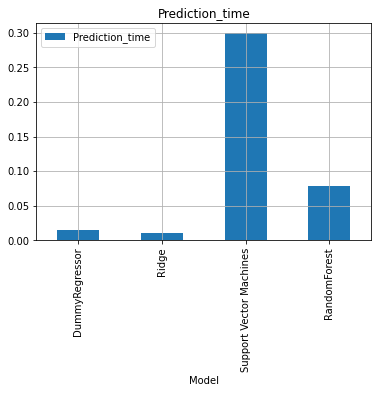

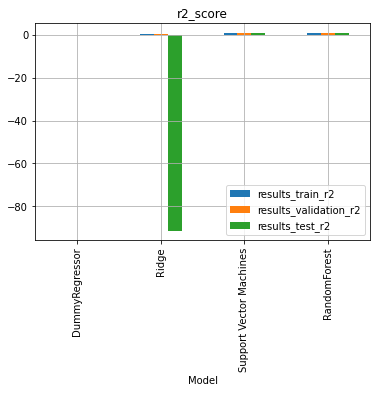

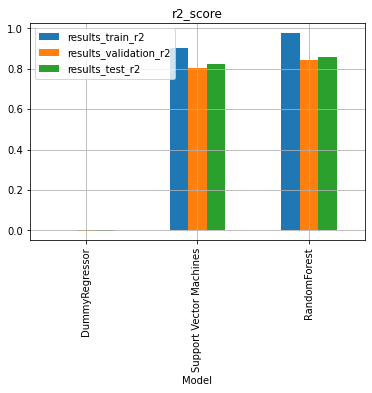

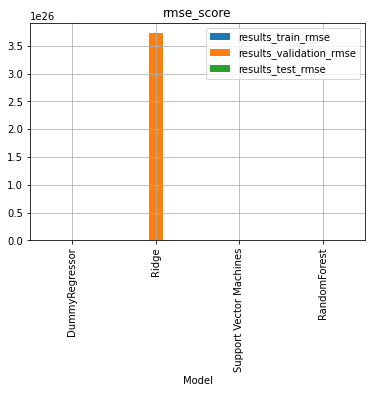

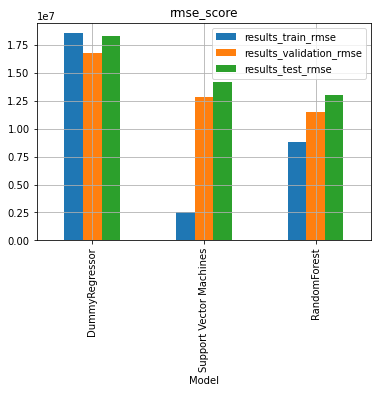

In [59]:
results_df = pd.DataFrame.from_dict(resultats_energy).set_index('Model')

results_df[["Training_time"]].plot(kind = 'bar', grid = True, title = "Training_time" )
results_df.drop(["Training_time"],axis=1, inplace=True)

results_df[["Prediction_time"]].plot(kind='bar', grid = True, title = "Prediction_time")
results_df.drop(["Prediction_time"],axis=1, inplace=True)

results_df[["results_train_r2","results_validation_r2",'results_test_r2']].plot(kind='bar' , grid = True, title = "r2_score")

results_df[["results_train_r2","results_validation_r2",'results_test_r2']].drop(index='Ridge').plot(kind='bar' , grid = True, title = "r2_score")

results_df.drop(["results_train_r2","results_validation_r2",'results_test_r2'],axis=1, inplace=True)

results_df.plot(kind='bar', grid = True, title = "rmse_score",use_index = True)
results_df.drop(index='Ridge',inplace = True)
results_df.plot(kind='bar', grid = True, title = "rmse_score")


On remarque que le support vector machine est avantagé au niveau du temps d'apprentissage, alors que RandomForest est l'algorithme qui généralise le mieux et il a un temps de prédiction meilleur.

## évaluation de  l’intérêt de la variable "ENERGYSTARScore" pour la prédiction d’émissions

In [60]:
#model_forest = Pipeline([('preprocessor',preprocessor),('Regressor', RandomForestRegressor( max_depth = research.best_params_['Regressor__max_depth'], min_samples_split = research.best_params_['Regressor__min_samples_split'], min_samples_leaf = research.best_params_['Regressor__min_samples_leaf'], max_features = research.best_params_['Regressor__max_features']))]) 

#start = time.time()
#model_forest.fit(X_train, y_train['TotalGHGEmissions'])
#end = time.time()

#prediction = model_forest.predict(X_train)

#results_train_r2= model_forest.score(X_train,y_train['TotalGHGEmissions'])
#results_train_rmse = mean_squared_error(np.exp(prediction),np.exp(y_train['TotalGHGEmissions']), squared=False)

#start_2 = time.time()
#prediction = model_forest.predict(X_test)
#end_2 = time.time()

#prediction = model_forest.predict(X_test)

#results_test_r2= model_forest.score(X_test,y_test['TotalGHGEmissions'])
#results_test_rmse = mean_squared_error(np.exp(prediction),np.exp(y_test['TotalGHGEmissions']), squared=False)

Pour évaluer l'intérêt de la variable "ENERGYSTARScore" pour la prédiction d’émissions; on va entrainer notre algorithme sur deux datasets, la première contient la variable "ENERGYSTARScore" et la deuxième sans cette variable.Ensuite, on va comparer les performances de l'algorithme et en fonction de ces résultats, on pourra déduire son intérêt.

In [72]:
numeric_features = [ 'PropertyGFAParking','PropertyGFABuilding(s)','ZipCode', 'Age', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA' , 'NumberofFloors', 'NumberofBuildings', 'Latitude', 'Longitude','ENERGYSTARScore']
categorical_features = ["BuildingType","PrimaryPropertyType",'Neighborhood']
numeric_features.remove('ENERGYSTARScore')

In [73]:
y = np.log(data[["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]])
X = data.drop(["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"],axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [75]:
params = model_forest_ghg.get_params()

In [76]:
model_forest_2  = Pipeline([('preprocessor',preprocessor),('Regressor', RandomForestRegressor( max_depth = research_ghg.best_params_['Regressor__max_depth'], min_samples_split = research_ghg.best_params_['Regressor__min_samples_split'], min_samples_leaf = research_ghg.best_params_['Regressor__min_samples_leaf'], max_features = research_ghg.best_params_['Regressor__max_features']))]) 




In [77]:

result_cv_ghg_2 = cross_validate(model_forest_2, X = X_train_2, y = y_train_2["TotalGHGEmissions"], scoring = scoring , return_train_score = True)


model_forest_2=model_forest_2.fit(X_train_2, y_train_2["TotalGHGEmissions"])


results_test_r2_2 = model_forest_2.score(X_test_2, y_test_2["TotalGHGEmissions"])
results_test_rmse_2 = mean_squared_error(np.exp(model_forest_2.predict(X_test_2)), np.exp(y_test_2["TotalGHGEmissions"]), squared=False)

In [78]:
print("Training r2 score: {}".format(result_cv_ghg['train_r2'].mean()))
print("Training r2 score sans ENERGYSTARScore : {}".format(result_cv_ghg_2['train_r2'].mean()))
print("Training rmse score: {}".format(result_cv_ghg['train_rmse'].mean()))
print("Training rmse score sans ENERGYSTARScore: {}".format(result_cv_ghg_2['train_rmse'].mean()))
print("Testing r2 score:{}".format(results_test_r2_ghg))
print("Testing r2 score sans ENERGYSTARScore:{}".format(results_test_r2_2))
print("Testing rmse score: {}".format(results_test_rmse_ghg))
print("Testing rmse score sans ENERGYSTARScore: {}".format(results_test_rmse_2))


Training r2 score: 0.9624367626542734
Training r2 score sans ENERGYSTARScore : 0.961013206109784
Training rmse score: 133.4581892222804
Training rmse score sans ENERGYSTARScore: 202.35930571112831
Testing r2 score:0.762929843933284
Testing r2 score sans ENERGYSTARScore:0.7707536117822864
Testing rmse score: 483.0504685422691
Testing rmse score sans ENERGYSTARScore: 198.85024986532005


On remarque que les valeurs obtenues sans la variables ENERGYSTARScore sont proches et presque identiques  aux valeurs obtenues lorsque la variables ENERGYSTARScore est dans le dataset.
On peut donc dire que la variable ENERGYSTARScore n'a pas trop d’intérêt  pour la prédiction d’émissions. On va faire une analyse aprofondie dans la partie suivante ( ça va montrer que c'est la cinquième/quatrième variable la plus importante pour le modèle

## Interprétation du model

In [79]:
preprocessor.fit(X_train)
X = preprocessor.transform(X_test)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['PropertyGFAParking',
                                  'PropertyGFABuilding(s)', 'ZipCode', 'Age',
                                  'ThirdLargestPropertyUseTypeGFA',
                                  'SecondLargestPropertyUseTypeGFA',
                                  'LargestPropertyUseTypeGFA', 'NumberofFloors',
                                  'NumberofBuildings', 'Latitude',
                                  'Longitude']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['BuildingType', 'PrimaryPropertyType',
                                  'Neighborhood'])])

In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 940 to 2489
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1307 non-null   object 
 1   PrimaryPropertyType              1307 non-null   object 
 2   ZipCode                          1304 non-null   float64
 3   Neighborhood                     1307 non-null   object 
 4   Latitude                         1307 non-null   float64
 5   Longitude                        1307 non-null   float64
 6   NumberofBuildings                1307 non-null   float64
 7   NumberofFloors                   1306 non-null   float64
 8   PropertyGFAParking               1307 non-null   int64  
 9   PropertyGFABuilding(s)           1307 non-null   int64  
 10  LargestPropertyUseTypeGFA        1273 non-null   float64
 11  SecondLargestPropertyUseTypeGFA  641 non-null    float64
 12  ThirdLargestProper

In [81]:
len(all_features)

64

Dans cette partie, on va expliquer un peu comment notre modèle opére. Pour ça, on va utiliser la technique de Permutation Importance; cette technique mesure l'importance des variables pour notre modèle. Elle fonctionne suivant le process :
   1. entreiner le modèle.
   2. Mélangez les valeurs dans une seule colonne, faites des prédictions à l'aide de l'ensemble de données résultant.            Utilisez ces prédictions et les vraies valeurs cibles pour calculer combien la fonction de perte a souffert de la            permutation. Cette détérioration des performances mesure l'importance de la variable que vous venez de mélanger.
   3. Remettez les données dans l'ordre d'origine (annulez la lecture aléatoire de l'étape 2). Répétez maintenant l'étape 2        avec la colonne suivante de l'ensemble de données, jusqu'à ce qu'on aura calculer l'importance de chaque colonne. 

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 1633 to 233
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     5225 non-null   object 
 1   PrimaryPropertyType              5225 non-null   object 
 2   ZipCode                          5215 non-null   float64
 3   Neighborhood                     5225 non-null   object 
 4   Latitude                         5225 non-null   float64
 5   Longitude                        5225 non-null   float64
 6   NumberofBuildings                5225 non-null   float64
 7   NumberofFloors                   5218 non-null   float64
 8   PropertyGFAParking               5225 non-null   int64  
 9   PropertyGFABuilding(s)           5225 non-null   int64  
 10  LargestPropertyUseTypeGFA        5115 non-null   float64
 11  SecondLargestPropertyUseTypeGFA  2561 non-null   float64
 12  ThirdLargestProper

In [85]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_forest_energy["Regressor"], random_state=1).fit(model_forest_energy["preprocessor"].transform(X_test).toarray(), y_test["SiteEnergyUse(kBtu)"])
eli5.show_weights(perm, feature_names = all_features)

Weight,Feature
0.2514 ± 0.0187,PropertyGFABuilding(s)
0.1649 ± 0.0121,LargestPropertyUseTypeGFA
0.0672 ± 0.0071,ENERGYSTARScore
0.0409 ± 0.0099,PrimaryPropertyType__Low-Rise Multifamily
0.0326 ± 0.0054,SecondLargestPropertyUseTypeGFA
0.0265 ± 0.0029,Age
0.0259 ± 0.0069,PropertyGFAParking
0.0222 ± 0.0049,BuildingType__NonResidential
0.0213 ± 0.0018,NumberofFloors
0.0175 ± 0.0053,BuildingType__Multifamily LR (1-4)


Pour interpréter les résultats au-dessus, il faut savoir que les features au top du tableau sont les plus importantes et que l'importance des variables décroit en allant vers le bas.

On remarque que la variable 'PropertyGFATotal' est la variable la plus importante pour notre modéle, la deuxième du classement est la variable 'Age' qui reflète le nombre d'années aprés la construction de la maison....

In [86]:
perm = PermutationImportance(model_forest_ghg["Regressor"], random_state=1).fit(model_forest_ghg["preprocessor"].transform(X_test).toarray(), y_test["TotalGHGEmissions"])
eli5.show_weights(perm, feature_names = all_features)

Weight,Feature
0.5873 ± 0.0546,PropertyGFABuilding(s)
0.1809 ± 0.0317,PrimaryPropertyType__Low-Rise Multifamily
0.1745 ± 0.0221,Age
0.1087 ± 0.0161,ENERGYSTARScore
0.0996 ± 0.0070,LargestPropertyUseTypeGFA
0.0397 ± 0.0045,Latitude
0.0332 ± 0.0032,Longitude
0.0247 ± 0.0055,NumberofFloors
0.0182 ± 0.0020,SecondLargestPropertyUseTypeGFA
0.0166 ± 0.0048,PrimaryPropertyType__Mid-Rise Multifamily


Le modèle randomforest possède un attribut 'feature_importances_'qui, nous permet d'avoir une idée sur l'importance des features

In [88]:

a = pd.DataFrame(data=model_forest_ghg["Regressor"].feature_importances_, columns= ['feature_importance'],index=all_features).sort_values('feature_importance', ascending=False)


In [93]:
a

,feature_importance
PropertyGFABuilding(s),0.411830
Age,0.102768
LargestPropertyUseTypeGFA,0.082263
PrimaryPropertyType__Low-Rise Multifamily,0.069801
ENERGYSTARScore,0.056057
...,...
PrimaryPropertyType__Residence Hall,0.000149
BuildingType__SPS-District K-12,0.000128
PrimaryPropertyType__Residence Hall/Dormitory,0.000094
BuildingType__Nonresidential WA,0.000016
